🌈 The format of the input file (SDF file) is a chemical structure file format used to represent molecular structures. It typically contains information such as atom types, bond types, and 3D coordinates of atoms.

🌈 The input tensors to the neural network model are:
   - `data`: Represents the node features or properties of the molecular structures. Its shape is `(batch_size, features)`, where `batch_size` is the number of samples in the batch, and `features` represents the number of features or properties for each node.
   - `edges`: Represents the edges or connections between nodes. Its shape is `(batch_size, max_edges, 2)`, where `max_edges` is the maximum number of edges in any graph in the batch, and `2` represents the two nodes connected by each edge.
   - `node2graph`: Represents the mapping of nodes to their respective graphs. Its shape is `(batch_size,)`, where each element represents the graph index for the corresponding node in the `data` tensor.

🌈 For `gnn_out`, each dimension likely symbolizes:
   - First dimension: Represents the batch size or the number of graphs.
   - Second dimension: Represents the number of nodes in each graph.
   - Third dimension: Represents the hidden feature dimension or the output dimension of the GCN layer.
   
   For `avg`, each dimension likely symbolizes:
   - First dimension: Represents the batch size or the number of graphs.
   - Second dimension: Represents the hidden feature dimension or the output dimension of the GCN layer after averaging over nodes in each graph.

🌈 `segment_mean` calculates the mean along segments, where the segments are defined by `segment_ids`. It calculates the mean of elements with the same segment ID. On the other hand, `tf.reduce_mean` calculates the mean across all elements in the input tensor. For `pred`, each dimension likely symbolizes:
   - First dimension: Represents the batch size or the number of samples.
   - Second dimension: Represents the output dimension of the neural network model, typically representing the predicted probability for each sample.

🌈 The motivation to use multiple GCN layers is to capture hierarchical and complex relationships within the graph structure. Each GCN layer can extract increasingly abstract and high-level features from the input graph. The depth of the network allows for more sophisticated feature learning and representation. In the template, multiple GCN layers were used, although the exact number was not specified.

✔️ **Problem Formulation:**
The problem involves predicting the anticancer activity of chemical compounds against non-small cell lung cancer based on their molecular structures represented as graphs. Each chemical compound is inputted as a graph, where atoms represent nodes and bonds represent edges. The output is binary, indicating whether a compound is positive (effective against cancer) or negative (not effective against cancer). The task requires a classification function to predict the binary outcome. Challenges may include handling the complexity of molecular structures, capturing subtle features that contribute to anticancer activity, and dealing with imbalanced datasets. The impact of accurately predicting anticancer activity is significant, as it can aid in drug discovery and development, potentially leading to new treatments for cancer. An ideal solution would be a neural network model capable of effectively learning features from molecular graphs and making accurate predictions based on those features. This model should be robust, interpretable, and generalizable to unseen chemical compounds. Additionally, it should handle imbalanced data and provide insights into the molecular features contributing to anticancer activity.

## Read SDF format data (structured-data format)

This Python code defines a function named `read_sdf` that reads content from a file, parses it into samples, and extracts information about nodes, links, and labels from each sample. Here's a breakdown of what the code does:

1. The code imports the `numpy` library and aliases it as `np`. It also imports the `tqdm` library from the `notebook` submodule, which is used to display progress bars for iterative processes.

2. The `read_sdf` function takes a file parameter as input.

3. Within the function:
   - The file is opened and its content is read.
   - The content is split into samples based on the delimiter "$$$$".
   - A nested function named `parse_sample` is defined to process each sample.
   - Each sample is split into lines, and information about nodes, links, and labels is extracted from each line.
   - For each line in the sample:
     - If the line contains '1.0', the label is set to 1.
     - If the line contains '-1.0', the label is set to 0.
     - If the line starts with four spaces, node information is extracted and appended to a list of nodes.
     - If the line starts with a single space, information about edges (links) is extracted and appended to a list of links.
   - The function returns a tuple containing lists of nodes, links (as numpy arrays), and the label.

4. Finally, the `read_sdf` function returns a list comprehension that applies the `parse_sample` function to each sample, using tqdm to display a progress bar. Samples with a length greater than 0 are included in the final list.



In [ ]:
import numpy as np  # Importing the numpy library and aliasing it as np
from tqdm.notebook import tqdm  # Importing the tqdm library for progress bar display

def read_sdf(file):  # Defining a function named read_sdf that takes a file parameter
    with open(file, 'r') as rf:  # Opening the file in read mode
        content = rf.read()  # Reading the content of the file
    samples = content.split('$$$$')  # Splitting the content into samples based on '$$$$'

    def parse_sample(s):  # Defining a nested function named parse_sample that takes a sample parameter
        lines = s.splitlines()  # Splitting the sample into lines
        links = []  # Initializing an empty list to store links
        nodes = []  # Initializing an empty list to store nodes
        label = 0  # Initializing label variable
        for l in lines:  # Iterating through lines in the sample
            if l.strip() == '1.0':  # Checking if line contains '1.0'
                label = 1  # Setting label to 1
            if l.strip() == '-1.0':  # Checking if line contains '-1.0'
                label = 0  # Setting label to 0
            if l.startswith('    '):  # Checking if line starts with four spaces
                feature = l.split()  # Splitting the line into components
                node = feature[3]  # Extracting the node information
                nodes.append(node)  # Appending node to the list
            elif l.startswith(' '):  # Checking if line starts with a single space
                lnk = l.split()  # Splitting the line into components
                # edge: (from, to,) (1-based index)
                if int(lnk[0]) - 1 < len(nodes):  # Checking if the starting node index is within bounds
                    links.append((  # Appending a tuple representing an edge to the list
                        int(lnk[0])-1,  # Starting node index (zero-based)
                        int(lnk[1])-1,  # Ending node index (zero-based)
                        # int(lnk[2]) ignore edge weight
                    ))
        return nodes, np.array(links), label  # Returning nodes, links, and label

    return [parse_sample(s) for s in tqdm(samples) if len(s[0]) > 0]  # Returning parsed samples with progress bar display if the sample length is greater than 0


In [ ]:
from sklearn.model_selection import train_test_split

training_set = read_sdf('train.sdf')
training_set, validation_set = train_test_split(training_set, test_size=0.15,)

  0%|          | 0/25024 [00:00<?, ?it/s]

In [ ]:
testing_set  = read_sdf('test_x.sdf')

  0%|          | 0/12326 [00:00<?, ?it/s]

In [ ]:
print(training_set[1])

(['S', 'S', 'S', 'O', 'O', 'O', 'O', 'O', 'O', 'N', 'N', 'N', 'N', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C'], array([[ 0, 13],
       [ 0, 19],
       [ 1, 15],
       [ 1, 20],
       [ 2,  6],
       [ 2,  7],
       [ 2,  8],
       [ 2, 25],
       [ 3, 16],
       [ 4, 22],
       [ 5, 22],
       [ 9, 13],
       [ 9, 15],
       [ 9, 16],
       [10, 11],
       [10, 13],
       [10, 18],
       [11, 17],
       [12, 15],
       [12, 21],
       [13, 14],
       [14, 17],
       [16, 19],
       [17, 22],
       [18, 23],
       [18, 24],
       [20, 21],
       [20, 28],
       [21, 29],
       [23, 26],
       [24, 27],
       [25, 26],
       [25, 27],
       [28, 30],
       [29, 31],
       [30, 31]]), 0)


## Visualizing/Inspecting a Sample

In [ ]:
!pip install --quiet networkx
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import cm
colors = cm.rainbow(np.linspace(0, 1, 50))



1. The function `visualize` takes a `sample` as input. The sample is assumed to be a tuple containing information about nodes and edges.

2. Within the function:
   - It initializes an empty graph `G` using NetworkX.
   - It extracts nodes and edges information from the `sample`.
   - It initializes a dictionary `labeldict` to store labels for nodes and a list `node_color` to store colors for each node.
   - It iterates over each node in the `nodes` list, adding nodes to the graph `G`, assigning labels from the `nodes` list to nodes in the graph, and assigning colors based on a hashing scheme.
   - It iterates over each edge in the `edges` list, adding edges to the graph `G`.
   - It draws the graph `G` using NetworkX's `draw` function, with node labels, node colors, and displays it using `plt.show()` (assuming `matplotlib.pyplot` is imported elsewhere).
   - It returns the graph `G`.



In [ ]:
def visualize(sample):  # Defining a function named visualize that takes a sample parameter
    G=nx.Graph()  # Creating an empty graph object using NetworkX
    nodes = sample[0]  # Extracting nodes from the sample
    edges = sample[1]  # Extracting edges from the sample

    labeldict={}  # Initializing an empty dictionary to store node labels
    node_color=[]  # Initializing an empty list to store node colors

    for i,n in enumerate(nodes):  # Iterating over nodes and their indices
        G.add_node(i)  # Adding a node to the graph with its index
        labeldict[i]=n  # Assigning the node label to the index in the label dictionary
        node_color.append(colors[hash(n)%len(colors)])  # Assigning a color to the node based on its hash value

    # a list of nodes:
    for e in edges:  # Iterating over edges
        G.add_edge(e[0], e[1])  # Adding an edge between two nodes in the graph

    nx.draw(G, labels=labeldict, with_labels = True, node_color = node_color)  # Drawing the graph with labels and node colors
    plt.show()  # Displaying the graph

    return G  # Returning the graph object


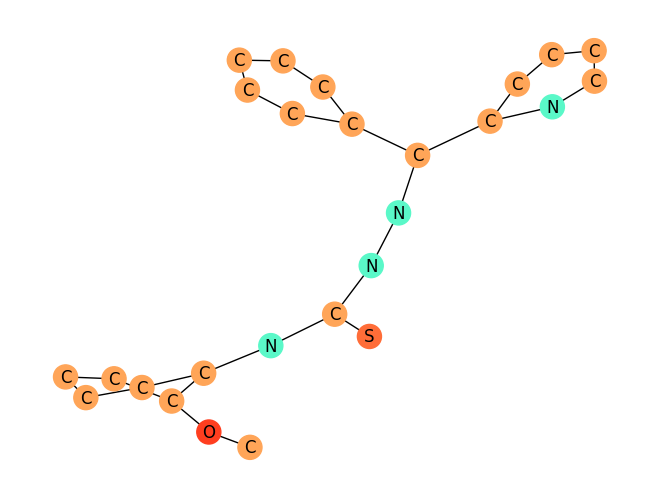

In [ ]:
plt.clf()
visualize(training_set[20])

## Preprocessing:

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

max_vocab = 500
max_len = 100


# build vocabulary from training set
all_nodes = [s[0] for s in training_set]
tokenizer = Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(all_nodes)



1. It imports the `pad_sequences` function from the TensorFlow Keras library for preprocessing sequences and the `random` module for randomization.

2. It sets the random seed to 0 to ensure reproducibility of random operations.

3. The `prepare_single_batch` function takes a list of samples as input and performs the following steps:
   - It extracts nodes from the samples.
   - It converts text tokens to sequences using a tokenizer (assuming `tokenizer` is defined elsewhere).
   - It pads sequences with zeros to ensure uniform length.
   - It determines the maximum length of nodes.
   - It adjusts edge indices to account for multiple samples.
   - It filters out empty edge lists.
   - It creates a mapping from nodes to graphs.
   - It flattens node and node-to-graph mapping arrays.
   - It returns a dictionary containing data for the batch (node data, edge data, and node-to-graph mapping), along with labels for the samples.

4. The `gen_batch` function generates batches from a dataset and accepts the following parameters:
   - `dataset`: The dataset from which batches are generated.
   - `batch_size` (default: 16): The size of each batch.
   - `repeat` (default: False): Whether to repeat batches indefinitely.
   - `shuffle` (default: True): Whether to shuffle the dataset before generating batches.

5. Within the `gen_batch` function:
   - It iterates indefinitely.
   - It converts the dataset to a list and shuffles it if shuffling is enabled.
   - It determines the length of the dataset.
   - It iterates over the dataset in batches based on the specified batch size.
   - It selects a batch of samples.
   - It yields the prepared batch using the `prepare_single_batch` function.
   - It breaks out of the loop if repeating batches is disabled.



In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences  # Importing the pad_sequences function from the preprocessing.sequence module in TensorFlow's Keras
import random  # Importing the random module
random.seed(0)  # Setting the random seed for reproducibility

def prepare_single_batch(samples):  # Defining a function named prepare_single_batch that takes a list of samples as input
    sample_nodes = [s[0] for s in samples]  # Extracting nodes from the samples
    sample_nodes = tokenizer.texts_to_sequences(sample_nodes)  # Converting text tokens to sequences
    sample_nodes = pad_sequences(sample_nodes, padding='post')  # Padding sequences to ensure uniform length
    max_nodes_len = np.shape(sample_nodes)[1]  # Determining the maximum length of nodes
    edges = [s[1]+i*max_nodes_len for i,s in enumerate(samples)]  # Adjusting edge indices to account for multiple samples
    edges = [e for e in edges if len(e) > 0]  # Filtering out empty edge lists
    node_to_graph = [[i]*max_nodes_len for i in range(len(samples))]  # Creating a mapping from nodes to graphs

    all_nodes = np.reshape(sample_nodes, -1)  # Flattening the node array
    all_edges = np.concatenate(edges)  # Concatenating edge arrays

    node_to_graph = np.reshape(node_to_graph, -1)  # Flattening the node-to-graph mapping
    return {  # Returning a dictionary containing data for the batch
        'data': all_nodes,  # Node data
        'edges': all_edges,  # Edge data
        'node2graph': node_to_graph,  # Mapping from nodes to graphs
    }, np.array([s[2] for s in samples])  # Returning labels for the samples

def gen_batch(dataset, batch_size=16, repeat=False, shuffle=True):  # Defining a function named gen_batch that generates batches from a dataset
    while True:  # Looping indefinitely
        dataset = list(dataset)  # Converting the dataset to a list
        if shuffle:  # Checking if shuffling is enabled
            random.shuffle(dataset)  # Shuffling the dataset
        l = len(dataset)  # Getting the length of the dataset
        for ndx in range(0, l, batch_size):  # Iterating over the dataset in batches
            batch_samples = dataset[ndx:min(ndx + batch_size, l)]  # Selecting a batch of samples
            yield prepare_single_batch(batch_samples)  # Yielding the prepared batch
        if not repeat:  # Checking if repeating batches is disabled
            break  # Exiting the loop if repeat is False


In [ ]:
# showing one batch:
for train_batch in gen_batch(training_set, batch_size=4):
    for k,v in train_batch[0].items():
        print(k)
        print(v)
        pass
    print('label', train_batch[1])
    break

data
[2 2 3 3 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 7 2 2 2 3 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 5 2 2 3 3 3 3 3 3 3 3 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 1 1 1 1 1 1 1 1 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
edges
[[  0   5]
 [  1   6]
 [  2  10]
 [  2  12]
 [  2  13]
 [  3  11]
 [  3  14]
 [  3  15]
 [  4   5]
 [  4   8]
 [  4  10]
 [  5   6]
 [  6   9]
 [  7   8]
 [  7   9]
 [  7  11]
 [ 31  43]
 [ 32  37]
 [ 33  38]
 [ 34  39]
 [ 35  37]
 [ 35  46]
 [ 35  47]
 [ 36  39]
 [ 36  41]
 [ 36  42]
 [ 37  38]
 [ 38  40]
 [ 39  40]
 [ 41  44]
 [ 42  45]
 [ 43  44]
 [ 43  45]
 [ 46  48]
 [ 47  49]
 [ 48  50]
 [ 49  51]
 [ 50  52]
 [ 51  53]
 [ 62  74]
 [ 63  85]
 [ 63  91]
 [ 64  88]
 [ 64  92]
 [ 65  68]
 [ 65  73]
 [ 65  76]
 [ 66  69]
 [ 66  73]
 [ 66  78]
 [ 67  71]
 [ 67  75]
 [ 67  77]
 [ 68  69]
 [ 70  72]
 [ 70  75]
 [ 71  72]
 [ 73  74]
 [ 74  75]
 [ 76  79]
 [ 76  80]
 [ 77  81]
 [ 77  82]
 [ 78  86]
 [ 78  87]
 [ 79  83]
 [ 80  84]

In [ ]:
!pip install --quiet tf2_gnn

# https://github.com/microsoft/tf2-gnn
# https://github.com/microsoft/tf2-gnn/blob/master/tf2_gnn/layers/gnn.py

from tf2_gnn.layers.gnn import GNN, GNNInput

This code sets up the model architecture using TensorFlow and Keras for graph-based tasks:

It imports necessary modules and functions from TensorFlow and Keras.
It defines input placeholders for the model, including placeholders for node features, edge information, and node-to-graph mapping.
It uses an Embedding layer to convert input tokens into fixed-size vectors.
It determines the number of graphs (samples) in the batch.
It creates input for the Graph Neural Network (GNN) layer.
It initializes the GNN layer with default hyperparameters and passes input through it to obtain GNN output.
It calculates the mean of GNN output across each graph using the segment_mean function.
It adds a Dense layer for prediction with a sigmoid activation function.
It creates the model with specified inputs and outputs.
Finally, it displays the summary of the model architecture.

In [ ]:
import tensorflow as tf  # Importing TensorFlow library
from tensorflow.math import segment_mean  # Importing segment_mean function from TensorFlow math module
from tensorflow import keras  # Importing Keras module from TensorFlow
from tensorflow.keras import Input, Model  # Importing Input and Model classes from Keras
from tensorflow.keras.layers import Embedding, Dense  # Importing Embedding and Dense layers from Keras
from tensorflow.keras.optimizers import Adam  # Importing Adam optimizer from Keras

# Defining input placeholders for the model
data = keras.Input(batch_shape=(None,))
edge = keras.Input(batch_shape=(None, 2), dtype=tf.int32)
node2graph = keras.Input(batch_shape=(None,), dtype=tf.int32)

# Embedding layer to convert input tokens to fixed-size vectors
embeded = Embedding(tokenizer.num_words, 20)(data)

# Determining the number of graphs (samples) in the batch
num_graph = tf.reduce_max(node2graph)+1

# Creating input for GNN (Graph Neural Network) layer
gnn_input = GNNInput(
    node_features=embeded,
    adjacency_lists=(edge,),
    node_to_graph_map=node2graph,
    num_graphs=num_graph,
)

# Creating GNN layer with default hyperparameters
params = GNN.get_default_hyperparameters()
params["hidden_dim"] = 32
gnn_layer = GNN(params)

# Passing input through GNN layer to get GNN output
gnn_out = gnn_layer(gnn_input)
print('gnn_out', gnn_out)

# Calculating mean of GNN output across each graph
avg = segment_mean(
    data=gnn_out,
    segment_ids=node2graph
)
print('mean:', avg)

# Dense layer for prediction with sigmoid activation
pred = Dense(1, activation='sigmoid')(avg)
print('pred:', pred)

# Creating the model with inputs and outputs
model = Model(
    inputs={
        'data': data,
        'edges': edge,
        'node2grah': node2graph,
    },
    outputs=pred
)

# Displaying model summary
model.summary()


gnn_out KerasTensor(type_spec=TensorSpec(shape=(None, 32), dtype=tf.float32, name=None), name='gnn_1/StatefulPartitionedCall:0', description="created by layer 'gnn_1'")
mean: KerasTensor(type_spec=TensorSpec(shape=(None, 32), dtype=tf.float32, name=None), name='tf.math.segment_mean_1/SegmentMean:0', description="created by layer 'tf.math.segment_mean_1'")
pred: KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_1/Sigmoid:0', description="created by layer 'dense_1'")
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None,)]                    0         []                            
                                                                                                  
 input_4 (InputLayer)        [(None,)]                    0         []     

In [ ]:
model.compile(
    loss='BinaryCrossentropy',
    metrics=['AUC']
)

# trial 1

In [ ]:
import math

batch_size = 16
num_batchs = math.ceil(len(training_set) / batch_size)
num_batchs_validation = math.ceil(len(validation_set) / batch_size)

model.fit(
    gen_batch(
        training_set, batch_size=batch_size, repeat=True
    ),
    steps_per_epoch=num_batchs,
    epochs=5,
    validation_data=gen_batch(
        validation_set, batch_size=16, repeat=True
    ),
    validation_steps=num_batchs_validation,
)

Epoch 1/5
1330/1330 [==============================] - 22s 14ms/step - loss: 0.2291 - auc: 0.5403 - val_loss: 0.1817 - val_auc: 0.6333
Epoch 2/5
1330/1330 [==============================] - 20s 15ms/step - loss: 0.1960 - auc: 0.6101 - val_loss: 0.1776 - val_auc: 0.6732
Epoch 3/5
1330/1330 [==============================] - 19s 14ms/step - loss: 0.1901 - auc: 0.6534 - val_loss: 0.1751 - val_auc: 0.6923
Epoch 4/5
1330/1330 [==============================] - 22s 16ms/step - loss: 0.1881 - auc: 0.6639 - val_loss: 0.2035 - val_auc: 0.6858
Epoch 5/5
1330/1330 [==============================] - 19s 14ms/step - loss: 0.1870 - auc: 0.6785 - val_loss: 0.1816 - val_auc: 0.6749


In [ ]:
y_pred = model.predict(
    gen_batch(testing_set, batch_size=16, shuffle=False)
)
y_pred = np.reshape(y_pred, -1)

771/771 [==============================] - 4s 5ms/step


In [ ]:
len(y_pred)

12326

In [ ]:
import pandas as pd
submission = pd.DataFrame({'label':y_pred})
submission.index.name = 'id'
submission.to_csv('submission1.csv')

the function defines input placeholders for the model, including placeholders for node features, edge information, and node-to-graph mapping.
It uses an Embedding layer to convert input tokens into fixed-size vectors.
It determines the number of graphs (samples) in the batch.
It creates input for the Graph Neural Network (GNN) layer.
It sets hyperparameters for the GNN layer based on the provided parameters dictionary.
It creates the GNN layer with custom hyperparameters.
It passes input through the GNN layer to obtain GNN output.
It calculates the mean of the GNN output across each graph.
It adds a Dense layer for prediction with a sigmoid activation function.
It creates the model with specified inputs and outputs.
It displays the summary of the model architecture.
Finally, it returns the built model.

In [ ]:
def build_model(parameters):  # Defining a function named build_model that takes a dictionary of parameters as input

    # Defining input placeholders for the model
    data = keras.Input(batch_shape=(None,))
    edge = keras.Input(batch_shape=(None, 2), dtype=tf.int32)
    node2graph = keras.Input(batch_shape=(None,), dtype=tf.int32)

    # Embedding layer to convert input tokens to fixed-size vectors
    embeded = Embedding(tokenizer.num_words, 20)(data)

    # Determining the number of graphs (samples) in the batch
    num_graph = tf.reduce_max(node2graph)+1

    # Creating input for GNN (Graph Neural Network) layer
    gnn_input = GNNInput(
        node_features=embeded,
        adjacency_lists=(edge,),
        node_to_graph_map=node2graph,
        num_graphs=num_graph,
    )

    # Getting default hyperparameters for GNN
    params = GNN.get_default_hyperparameters()

    # Setting hyperparameters based on the provided parameters dictionary
    for key, val in parameters.items():
        params[key] = val

    # Creating GNN layer with custom hyperparameters
    gnn_layer = GNN(params)

    # Passing input through GNN layer to get GNN output
    gnn_out = gnn_layer(gnn_input)
    print('gnn_out', gnn_out)

    # Calculating mean of GNN output across each graph
    avg = segment_mean(
        data=gnn_out,
        segment_ids=node2graph
    )
    print('mean:', avg)

    # Dense layer for prediction with sigmoid activation
    pred = Dense(1, activation='sigmoid')(avg)
    print('pred:', pred)

    # Creating the model with inputs and outputs
    model = Model(
        inputs={
            'data': data,
            'edges': edge,
            'node2grah': node2graph,
        },
        outputs=pred
    )

    # Displaying model summary
    model.summary()

    return model  # Returning the model


In [ ]:

import pandas as pd
def save_output(y_pred, file_name):
    submission = pd.DataFrame({'label':y_pred})
    submission.index.name = 'id'
    submission.to_csv(f'{file_name}.csv')


# trial 2:

In [ ]:
parameters = {"hidden_dim": 128,
              "message_passing": "GGNN"}

model = build_model(parameters)
model.compile(
    loss='BinaryCrossentropy',
    metrics=['AUC']
)
import math

batch_size = 16
num_batchs = math.ceil(len(training_set) / batch_size)
num_batchs_validation = math.ceil(len(validation_set) / batch_size)

model.fit(
    gen_batch(
        training_set, batch_size=batch_size, repeat=True
    ),
    steps_per_epoch=num_batchs,
    epochs=10,
    validation_data=gen_batch(
        validation_set, batch_size=16, repeat=True
    ),
    validation_steps=num_batchs_validation,
)
y_pred = model.predict(
    gen_batch(testing_set, batch_size=16, shuffle=False)
)
y_pred = np.reshape(y_pred, -1)
# save the test prediction
save_output(y_pred, "sample_submission2")

gnn_out KerasTensor(type_spec=TensorSpec(shape=(None, 128), dtype=tf.float32, name=None), name='gnn_2/StatefulPartitionedCall:0', description="created by layer 'gnn_2'")
mean: KerasTensor(type_spec=TensorSpec(shape=(None, 128), dtype=tf.float32, name=None), name='tf.math.segment_mean_2/SegmentMean:0', description="created by layer 'tf.math.segment_mean_2'")
pred: KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_2/Sigmoid:0', description="created by layer 'dense_2'")
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_9 (InputLayer)        [(None,)]                    0         []                            
                                                                                                  
 input_7 (InputLayer)        [(None,)]                    0         []   

# trial 3:

In [ ]:
parameters = {"hidden_dim": 128,
              "message_passing": "RGCN"}

model = build_model(parameters)
model.compile(
    loss='BinaryCrossentropy',
    metrics=['AUC']
)
import math

batch_size = 16
num_batchs = math.ceil(len(training_set) / batch_size)
num_batchs_validation = math.ceil(len(validation_set) / batch_size)

model.fit(
    gen_batch(
        training_set, batch_size=batch_size, repeat=True
    ),
    steps_per_epoch=num_batchs,
    epochs=10,
    validation_data=gen_batch(
        validation_set, batch_size=16, repeat=True
    ),
    validation_steps=num_batchs_validation,
)
y_pred = model.predict(
    gen_batch(testing_set, batch_size=16, shuffle=False)
)
y_pred = np.reshape(y_pred, -1)
# save the test prediction
save_output(y_pred, "sample_submission3")

gnn_out KerasTensor(type_spec=TensorSpec(shape=(None, 128), dtype=tf.float32, name=None), name='gnn_3/StatefulPartitionedCall:0', description="created by layer 'gnn_3'")
mean: KerasTensor(type_spec=TensorSpec(shape=(None, 128), dtype=tf.float32, name=None), name='tf.math.segment_mean_3/SegmentMean:0', description="created by layer 'tf.math.segment_mean_3'")
pred: KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_3/Sigmoid:0', description="created by layer 'dense_3'")
Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_12 (InputLayer)       [(None,)]                    0         []                            
                                                                                                  
 input_10 (InputLayer)       [(None,)]                    0         []   

# trial 4:

In [ ]:
parameters = {"hidden_dim": 128,
              "message_passing": "RGIN"}

model = build_model(parameters)
model.compile(
    loss='BinaryCrossentropy',
    metrics=['AUC']
)
import math

batch_size = 50
num_batchs = math.ceil(len(training_set) / batch_size)
num_batchs_validation = math.ceil(len(validation_set) / batch_size)

model.fit(
    gen_batch(
        training_set, batch_size=batch_size, repeat=True
    ),
    steps_per_epoch=num_batchs,
    epochs=10,
    validation_data=gen_batch(
        validation_set, batch_size=16, repeat=True
    ),
    validation_steps=num_batchs_validation,
)
y_pred = model.predict(
    gen_batch(testing_set, batch_size=16, shuffle=False)
)
y_pred = np.reshape(y_pred, -1)
# save the test prediction
save_output(y_pred, "sample_submission4")

gnn_out KerasTensor(type_spec=TensorSpec(shape=(None, 128), dtype=tf.float32, name=None), name='gnn_5/StatefulPartitionedCall:0', description="created by layer 'gnn_5'")
mean: KerasTensor(type_spec=TensorSpec(shape=(None, 128), dtype=tf.float32, name=None), name='tf.math.segment_mean_5/SegmentMean:0', description="created by layer 'tf.math.segment_mean_5'")
pred: KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_5/Sigmoid:0', description="created by layer 'dense_5'")
Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_18 (InputLayer)       [(None,)]                    0         []                            
                                                                                                  
 input_16 (InputLayer)       [(None,)]                    0         []   

# trial 5:

In [ ]:
parameters = {"hidden_dim": 128,
              "message_passing": "RGIN"}

model = build_model(parameters)
model.compile(
    loss='BinaryCrossentropy',
    metrics=['AUC']
)

import math

batch_size = 16
num_batchs = math.ceil(len(training_set) / batch_size)
num_batchs_validation = math.ceil(len(validation_set) / batch_size)

model.fit(
    gen_batch(
        training_set, batch_size=batch_size, repeat=True
    ),
    steps_per_epoch=num_batchs,
    epochs=10,
    validation_data=gen_batch(
        validation_set, batch_size=16, repeat=True
    ),
    validation_steps=num_batchs_validation,
)
y_pred = model.predict(
    gen_batch(testing_set, batch_size=16, shuffle=False)
)
y_pred = np.reshape(y_pred, -1)
# save the test prediction
save_output(y_pred, "sample_submission5")

gnn_out KerasTensor(type_spec=TensorSpec(shape=(None, 128), dtype=tf.float32, name=None), name='gnn_6/StatefulPartitionedCall:0', description="created by layer 'gnn_6'")
mean: KerasTensor(type_spec=TensorSpec(shape=(None, 128), dtype=tf.float32, name=None), name='tf.math.segment_mean_6/SegmentMean:0', description="created by layer 'tf.math.segment_mean_6'")
pred: KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_6/Sigmoid:0', description="created by layer 'dense_6'")
Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_21 (InputLayer)       [(None,)]                    0         []                            
                                                                                                  
 input_19 (InputLayer)       [(None,)]                    0         []   

# trial 6:

In [ ]:
parameters = {"hidden_dim": 128,
              "message_passing": "GNN-Egde-MLP"}

model = build_model(parameters)

model.compile(
    loss='BinaryCrossentropy',
    metrics=['AUC']
)
import math

batch_size = 16
num_batchs = math.ceil(len(training_set) / batch_size)
num_batchs_validation = math.ceil(len(validation_set) / batch_size)

model.fit(
    gen_batch(
        training_set, batch_size=batch_size, repeat=True
    ),
    steps_per_epoch=num_batchs,
    epochs=10,
    validation_data=gen_batch(
        validation_set, batch_size=16, repeat=True
    ),
    validation_steps=num_batchs_validation,
)
y_pred = model.predict(
    gen_batch(testing_set, batch_size=16, shuffle=False)
)
y_pred = np.reshape(y_pred, -1)
# save the test prediction
save_output(y_pred, "sample_submission6")

gnn_out KerasTensor(type_spec=TensorSpec(shape=(None, 128), dtype=tf.float32, name=None), name='gnn_7/StatefulPartitionedCall:0', description="created by layer 'gnn_7'")
mean: KerasTensor(type_spec=TensorSpec(shape=(None, 128), dtype=tf.float32, name=None), name='tf.math.segment_mean_7/SegmentMean:0', description="created by layer 'tf.math.segment_mean_7'")
pred: KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_7/Sigmoid:0', description="created by layer 'dense_7'")
Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_24 (InputLayer)       [(None,)]                    0         []                            
                                                                                                  
 input_22 (InputLayer)       [(None,)]                    0         []   

# trial 7:

In [ ]:
parameters = {"hidden_dim": 128,
              "message_passing": "GNN-FiLM"}

model = build_model(parameters)

model.compile(
    loss='BinaryCrossentropy',
    metrics=['AUC']
)
import math

batch_size = 16
num_batchs = math.ceil(len(training_set) / batch_size)
num_batchs_validation = math.ceil(len(validation_set) / batch_size)

model.fit(
    gen_batch(
        training_set, batch_size=batch_size, repeat=True
    ),
    steps_per_epoch=num_batchs,
    epochs=10,
    validation_data=gen_batch(
        validation_set, batch_size=16, repeat=True
    ),
    validation_steps=num_batchs_validation,
)
y_pred = model.predict(
    gen_batch(testing_set, batch_size=16, shuffle=False)
)
y_pred = np.reshape(y_pred, -1)
# save the test prediction
save_output(y_pred, "sample_submission7")

gnn_out KerasTensor(type_spec=TensorSpec(shape=(None, 128), dtype=tf.float32, name=None), name='gnn_8/StatefulPartitionedCall:0', description="created by layer 'gnn_8'")
mean: KerasTensor(type_spec=TensorSpec(shape=(None, 128), dtype=tf.float32, name=None), name='tf.math.segment_mean_8/SegmentMean:0', description="created by layer 'tf.math.segment_mean_8'")
pred: KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_8/Sigmoid:0', description="created by layer 'dense_8'")
Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_27 (InputLayer)       [(None,)]                    0         []                            
                                                                                                  
 input_25 (InputLayer)       [(None,)]                    0         []   

# trial 8:

In [ ]:

parameters = {"hidden_dim": 128,
              "message_passing": "GNN-FiLM",
              "num_layers": 10}

model = build_model(parameters)

model.compile(
    loss='BinaryCrossentropy',
    metrics=['AUC']
)
import math

batch_size = 50
num_batchs = math.ceil(len(training_set) / batch_size)
num_batchs_validation = math.ceil(len(validation_set) / batch_size)

model.fit(
    gen_batch(
        training_set, batch_size=batch_size, repeat=True
    ),
    steps_per_epoch=num_batchs,
    epochs=10,
    validation_data=gen_batch(
        validation_set, batch_size=16, repeat=True
    ),
    validation_steps=num_batchs_validation,
)
y_pred = model.predict(
    gen_batch(testing_set, batch_size=16, shuffle=False)
)
y_pred = np.reshape(y_pred, -1)
# save the test prediction
save_output(y_pred, "sample_submission8")

gnn_out KerasTensor(type_spec=TensorSpec(shape=(None, 128), dtype=tf.float32, name=None), name='gnn_10/StatefulPartitionedCall:0', description="created by layer 'gnn_10'")
mean: KerasTensor(type_spec=TensorSpec(shape=(None, 128), dtype=tf.float32, name=None), name='tf.math.segment_mean_10/SegmentMean:0', description="created by layer 'tf.math.segment_mean_10'")
pred: KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_10/Sigmoid:0', description="created by layer 'dense_10'")
Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_33 (InputLayer)       [(None,)]                    0         []                            
                                                                                                  
 input_31 (InputLayer)       [(None,)]                    0       

# trial 9:

In [ ]:
parameters = {"hidden_dim": 128,
              "message_passing": "GNN-Egde-MLP",
              "layer_input_dropout_rate": 0.5}

model = build_model(parameters)
model.compile(
    loss='BinaryCrossentropy',
    metrics=['AUC']
)

import math

batch_size = 16
num_batchs = math.ceil(len(training_set) / batch_size)
num_batchs_validation = math.ceil(len(validation_set) / batch_size)

model.fit(
    gen_batch(
        training_set, batch_size=batch_size, repeat=True
    ),
    steps_per_epoch=num_batchs,
    epochs=10,
    validation_data=gen_batch(
        validation_set, batch_size=16, repeat=True
    ),
    validation_steps=num_batchs_validation,
)
y_pred = model.predict(
    gen_batch(testing_set, batch_size=16, shuffle=False)
)
y_pred = np.reshape(y_pred, -1)
# save the test prediction
save_output(y_pred, "sample_submission9")

gnn_out KerasTensor(type_spec=TensorSpec(shape=(None, 128), dtype=tf.float32, name=None), name='gnn_12/StatefulPartitionedCall:0', description="created by layer 'gnn_12'")
mean: KerasTensor(type_spec=TensorSpec(shape=(None, 128), dtype=tf.float32, name=None), name='tf.math.segment_mean_12/SegmentMean:0', description="created by layer 'tf.math.segment_mean_12'")
pred: KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_12/Sigmoid:0', description="created by layer 'dense_12'")
Model: "model_12"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_39 (InputLayer)       [(None,)]                    0         []                            
                                                                                                  
 input_37 (InputLayer)       [(None,)]                    0       

# trial 10:

In [ ]:
parameters = {"hidden_dim": 128,
              "message_passing": "GNN-FiLM",
              "layer_input_dropout_rate": 0.5}

model = build_model(parameters)

model.compile(
    loss='BinaryCrossentropy',
    metrics=['AUC']
)
import math

batch_size = 16
num_batchs = math.ceil(len(training_set) / batch_size)
num_batchs_validation = math.ceil(len(validation_set) / batch_size)

model.fit(
    gen_batch(
        training_set, batch_size=batch_size, repeat=True
    ),
    steps_per_epoch=num_batchs,
    epochs=10,
    validation_data=gen_batch(
        validation_set, batch_size=16, repeat=True
    ),
    validation_steps=num_batchs_validation,
)
y_pred = model.predict(
    gen_batch(testing_set, batch_size=16, shuffle=False)
)
y_pred = np.reshape(y_pred, -1)
# save the test prediction
save_output(y_pred, "sample_submission10")

gnn_out KerasTensor(type_spec=TensorSpec(shape=(None, 128), dtype=tf.float32, name=None), name='gnn_15/StatefulPartitionedCall:0', description="created by layer 'gnn_15'")
mean: KerasTensor(type_spec=TensorSpec(shape=(None, 128), dtype=tf.float32, name=None), name='tf.math.segment_mean_15/SegmentMean:0', description="created by layer 'tf.math.segment_mean_15'")
pred: KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_15/Sigmoid:0', description="created by layer 'dense_15'")
Model: "model_15"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_48 (InputLayer)       [(None,)]                    0         []                            
                                                                                                  
 input_46 (InputLayer)       [(None,)]                    0       

# the comparison of the trials:

1. **Trial 1:**
   - Parameters: `{"hidden_dim": 32}`
   - Result:
     - Loss: 0.1870, AUC: 0.6785
     - Validation Loss: 0.1816, Validation AUC: 0.6749
  This trial uses a GCNN with a hidden dimension of 32. The model achieves a moderate AUC score on both training and validation sets.

2. **Trial 2:**
   - Parameters: `{"hidden_dim": 128, "message_passing": "GGNN"}`
   - Result:
     - Loss: 0.1801, AUC: 0.7240
     - Validation Loss: 0.1931, Validation AUC: 0.6781
This trial increases the hidden dimension to 128 and employs Gated Graph Neural Network (GGNN) for message passing. The model achieves a higher AUC score compared to Trial 1.

3. **Trial 3:**
   - Parameters: `{"hidden_dim": 128, "message_passing": "RGCN"}`
   - Result:
     - Loss: 0.1791, AUC: 0.7262
     - Validation Loss: 0.1682, Validation AUC: 0.7417
  This trial uses Relational Graph Convolutional Network (RGCN) for message passing. It achieves the highest AUC score on the validation set among the trials.


4. **Trial 4:**
   - Parameters: `{"hidden_dim": 128, "message_passing": "RGIN"}`
   - Batch Size: 50
   - Result:
     - Loss: 0.1821, AUC: 0.7013
     - Validation Loss: 0.1862, Validation AUC: 0.7364
This trial employs Relational Graph Isomorphism Network (RGIN) for message passing with a batch size of 50. It achieves a relatively lower AUC score compared to Trial 3.

5. **Trial 5:**
   - Parameters: `{"hidden_dim": 128, "message_passing": "RGIN"}`
   - Batch Size: 16
   - Result:
     - Loss: 0.1796, AUC: 0.7303
     - Validation Loss: 0.1762, Validation AUC: 0.7443
Similar to Trial 4 but with a batch size of 16, it achieves a slightly higher AUC score on both training and validation sets.

   
6. **Trial 6:**
   - Parameters: `{"hidden_dim": 128, "message_passing": "GNN-Egde-MLP"}`
   - Result:
     - Loss: 0.1803, AUC: 0.7307
     - Validation Loss: 0.1826, Validation AUC: 0.6933
This trial uses a GCNN with GNN-Edge-MLP message passing. It achieves a moderate AUC score on the validation set.

7. **Trial 7:**
   - Parameters: `{"hidden_dim": 128, "message_passing": "GNN-FiLM"}`
   - Result:
     - Loss: 0.1820, AUC: 0.7266
     - Validation Loss: 0.1686, Validation AUC: 0.7262
This trial employs FiLM-based message passing. It achieves a balanced AUC score on both training and validation sets.

8. **Trial 8:**
   - Parameters: `{"hidden_dim": 128, "message_passing": "GNN-FiLM", "num_layers": 10}`
   - Result:
     - Loss: 0.1917, AUC: 0.6413
     - Validation Loss: 0.1723, Validation AUC: 0.6601
This trial increases the number of layers to 10 while using FiLM-based message passing. However, it achieves a lower AUC score compared to previous trials.

9. **Trial 9:**
   - Parameters: `{"hidden_dim": 128, "message_passing": "GNN-Egde-MLP", "layer_input_dropout_rate": 0.5}`
   - Result:
     - Loss: 0.1849, AUC: 0.6966
     - Validation Loss: 0.1837, Validation AUC: 0.6828
This trial uses GNN-Edge-MLP message passing with layer input dropout rate of 0.5. It achieves a moderate AUC score on the validation set.

10. **Trial 10:**
    - Parameters: `{"hidden_dim": 128, "message_passing": "GNN-FiLM", "layer_input_dropout_rate": 0.5}`
    - Result:
      - Loss: 0.1924, AUC: 0.6564
      - Validation Loss: 0.1835, Validation AUC: 0.6127
Similar to Trial 7 but with a layer input dropout rate of 0.5, it achieves a lower AUC score on both training and validation sets.

To determine the best trial among the 10, we typically consider the metric that is most important for the specific task at hand, Looking at the validation AUC scores:

1. Trial 3 (RGCN message passing) achieved the highest validation AUC of 0.7417.
2. Trial 5 (RGIN message passing with batch size 16) achieved a validation AUC of 0.7443.

Based on these results, Trial 5 appears to be the best among the 10 trials as it achieved the highest validation AUC score. Therefore, Trial 5 would be considered the best for this task.